In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [11]:
df = pd.read_csv("data.csv")

In [12]:
df.head()
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop = True)

,Distance (nm),Force (nN),Distance (nm),Force (nN)
0,1.67E+03,-1.68E-02,1.50E+00,32.82
1,1.66E+03,1.68E-03,6.42E-01,32.76
2,1.66E+03,-1.68E-03,-6.42E-01,32.52
3,1.66E+03,-1.68E-02,-1.58E+00,32.16
4,1.65E+03,-2.19E-02,-2.14E+00,31.70
...,...,...,...,...
507,-3.17E-01,3.06E+01,1.64E+03,0.00
508,-1.81E-01,3.10E+01,1.64E+03,0.01
509,-2.94E-02,3.15E+01,1.65E+03,0.00
510,2.94E-02,3.19E+01,1.65E+03,-0.01


In [13]:
approachdf = df.iloc[:, [0, 1]]
approachdf = approachdf.astype(float)
retractiondf = df.iloc[:, [2, 3]]
retractiondf = retractiondf.astype(float)

In [14]:
approachdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 1 to 512
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance (nm)  512 non-null    float64
 1   Force (nN)     512 non-null    float64
dtypes: float64(2)
memory usage: 8.1 KB


In [15]:
# Aplicar el método del trapecio
# Asegurarse de que los datos están en el mismo rango
min_z = max(approachdf['Distance (nm)'].min(), retractiondf['Distance (nm)'].min())
max_z = min(approachdf['Distance (nm)'].max(), retractiondf['Distance (nm)'].max())

E_adhesion = np.trapz(retractiondf['Force (nN)'], retractiondf['Distance (nm)'])

print(f"Energía de adhesión: {E_adhesion} J")

Energía de adhesión: -885.187905 J


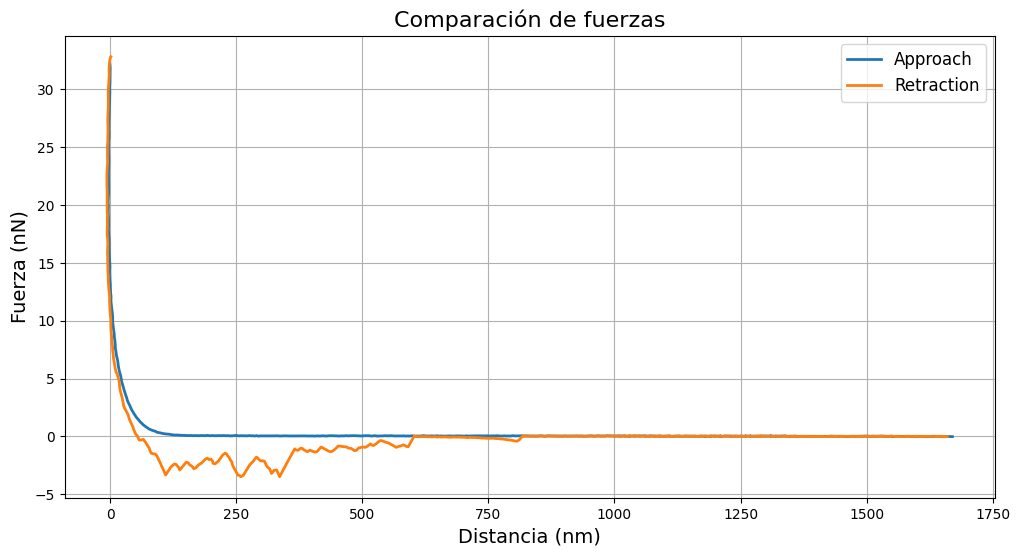

In [16]:
# Crear una figura y un subplot con 1 fila y 2 columnas
plt.figure(figsize=(12, 6))

# Primer subplot (izquierda)
plt.plot(approachdf['Distance (nm)'], approachdf['Force (nN)'], label = 'Approach', linewidth = 2)
plt.plot(retractiondf['Distance (nm)'], retractiondf['Force (nN)'], label = 'Retraction', linewidth = 2)

plt.xlabel('Distancia (nm)', fontsize=14)
plt.ylabel('Fuerza (nN)', fontsize=14)
plt.title('Comparación de fuerzas', fontsize=16)
plt.legend(fontsize='large')

plt.grid()

# Mostrar el subplot
plt.show()

Área entre las curvas: -1153.693544114786 nN·nm


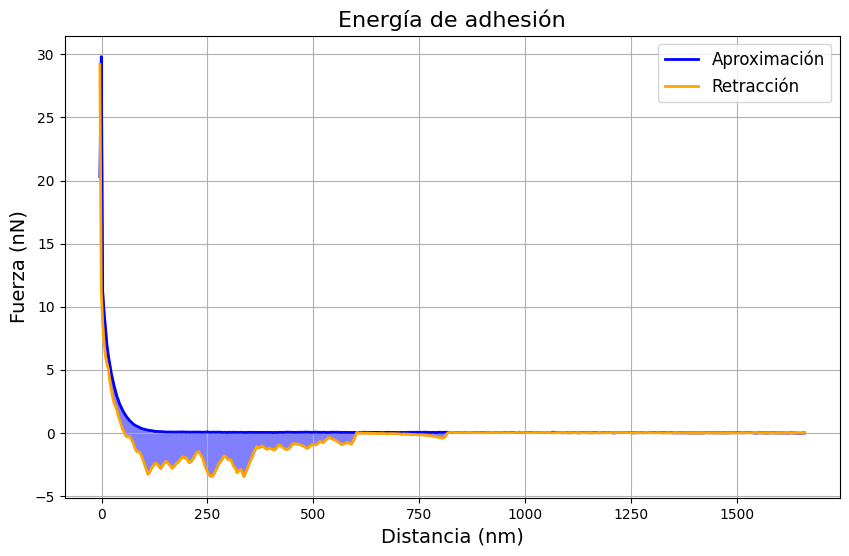

In [31]:

# Asegurarse de que los datos están en el mismo rango
min_z = max(approachdf['Distance (nm)'].min(), retractiondf['Distance (nm)'].min())
max_z = min(approachdf['Distance (nm)'].max(), retractiondf['Distance (nm)'].max())

# Interpolar las curvas para asegurarse de que tienen los mismos puntos
f_interp_approach = interp1d(approachdf['Distance (nm)'], approachdf['Force (nN)'], kind='linear', bounds_error=False, fill_value="extrapolate")
f_interp_retraction = interp1d(retractiondf['Distance (nm)'], retractiondf['Force (nN)'], kind='linear', bounds_error=False, fill_value="extrapolate")

# Crear un conjunto común de puntos de distancia dentro del rango compartido
z_common = np.linspace(min_z, max_z, 500)

# Calcular las fuerzas interpoladas en los puntos comunes
F_approach_interp = f_interp_approach(z_common)
F_retraction_interp = f_interp_retraction(z_common)

# Calcular el área entre las dos curvas
area_between_curves = np.trapz(F_retraction_interp - F_approach_interp, z_common)
print(f"Área entre las curvas: {area_between_curves} nN·nm")

# Graficar las curvas y el área entre ellas
plt.figure(figsize=(10, 6))
plt.plot(z_common, F_approach_interp, label='Aproximación', color='blue', linewidth = 2)
plt.plot(z_common, F_retraction_interp, label='Retracción', color='orange',linewidth = 2)
plt.fill_between(z_common, F_approach_interp, F_retraction_interp, color='blue', alpha=0.5)
plt.xlabel('Distancia (nm)', fontsize=14)
plt.ylabel('Fuerza (nN)', fontsize=14)
plt.title('Energía de adhesión', fontsize=16)
plt.legend(fontsize='large')
plt.grid(True)
plt.show()